# "Keras CNN - MNIST classification"

- title: "Keras CNN: - MNIST classification"
- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [keras, cnn, tensorflow, matplotlib, classification, python]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizing the Image Data

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image.shape

(28, 28)

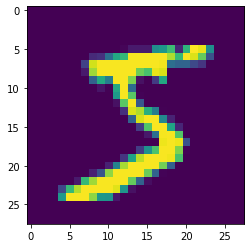

In [6]:
plt.imshow(single_image)

# PreProcess

## Label Data

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test  = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train,10)

## Feature Data

In [18]:
# normalize X data

single_image.max(), 

(255,)

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test  = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.max()

1.0

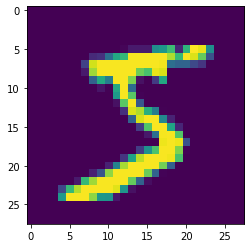

In [23]:
plt.imshow(scaled_single)

# Reshape Data

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
# Reshape to include channel dimension

x_train = x_train.reshape(60000, 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(10000, 28, 28, 1)

x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf

#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [29]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(4,4), activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                46100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 46,582
Trainable params: 46,582
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

# Save and Load data and model

In [ ]:
from numpy import save
from numpy import load
from tensorflow.keras.models import load_model

save('x_train.npy', x_train)
save('y_cat_train.npy', y_cat_train)

model.save('my_model.h5')

In [ ]:
load('x_train.npy')
load('y_cat_train.npy');

model = load_model('my_model.h5')

# Train Model

In [33]:
model.fit(x_train, y_cat_train, epochs=30, batch_size=256,
          validation_data=(x_test, y_cat_test), 
          verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 168us/sample - loss: 0.5176 - accuracy: 0.8474 - val_loss: 0.1848 - val_accuracy: 0.9462
Epoch 2/30
60000/60000 [==============================] - 9s 142us/sample - loss: 0.1605 - accuracy: 0.9535 - val_loss: 0.1215 - val_accuracy: 0.9641
Epoch 3/30
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1113 - accuracy: 0.9681 - val_loss: 0.0949 - val_accuracy: 0.9711
Epoch 4/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0909 - accuracy: 0.9740 - val_loss: 0.0809 - val_accuracy: 0.9746
Epoch 5/30
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0748 - accuracy: 0.9782 - val_loss: 0.0695 - val_accuracy: 0.9786
Epoch 6/30
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0643 - accuracy: 0.9814 - val_loss: 0.0632 - val_accuracy: 0.9790
Epoch 7/30
60000/60000 [=========================

# Evaluate the Model

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

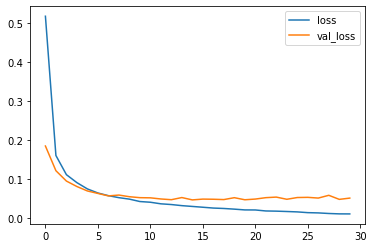

In [40]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

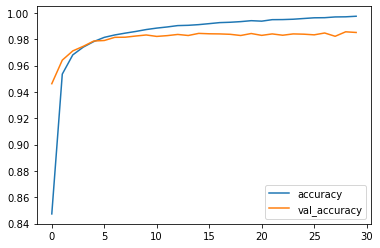

In [41]:
losses[['accuracy','val_accuracy']].plot()

In [43]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.05124218984251929, 0.9851]


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
predictions = model.predict_classes(x_test)

In [46]:
predictions[0]

7

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[ 974    0    2    0    0    0    2    2    0    0]
 [   0 1130    2    0    0    1    1    1    0    0]
 [   2    2 1012    3    0    0    2    8    2    1]
 [   0    0    1 1001    0    4    0    2    2    0]
 [   0    1    0    0  972    0    2    1    0    6]
 [   1    0    1    6    0  881    3    0    0    0]
 [   5    2    1    0    3    5  941    0    1    0]
 [   0    1    4    3    1    0    0 1017    1    1]
 [   6    0    4    2    0    4    1    4  950    3]
 [   2    2    1    5   10    6    0    9    1  973]]


In [49]:
import seaborn as sns

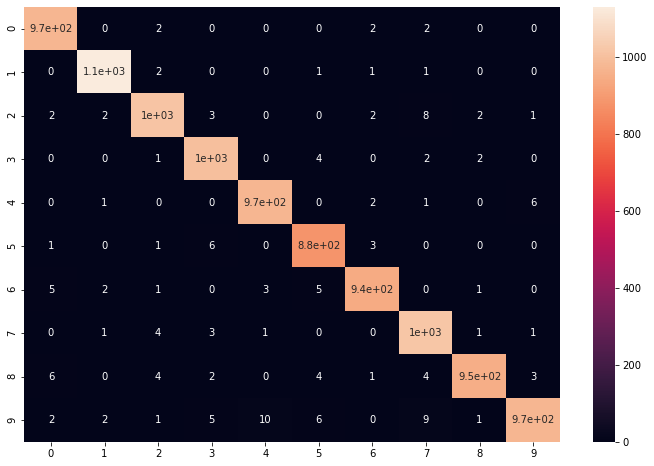

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

# Predict a given image

In [56]:
new_num = x_test[4]

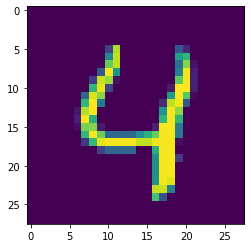

In [59]:
plt.imshow(new_num.reshape(28,28));

In [65]:
model.predict(new_num.reshape(1,28,28,1))

array([[1.5632841e-10, 5.4694190e-11, 8.7363444e-10, 4.7918874e-11,
        9.9992108e-01, 3.0790169e-11, 7.6901131e-11, 2.0181250e-07,
        3.2277640e-07, 7.8314668e-05]], dtype=float32)

In [66]:
model.predict(new_num.reshape(1,28,28,1)).argmax()

4

In [67]:
# or you can use this
model.predict_classes(new_num.reshape(1,28,28,1))

array([4])